created on Jan 26, 2025
By Kimia

##Part A
#1 and 2 import modules and dataset

In [14]:
##part A
# 1) import modules

import numpy as np
import pandas as pd
import openpyxl

from get_regression_coefs_general import get_regression_coefs # import our function to get GDP trend
# For plotting
import matplotlib.pyplot as plt
# import seaborn as sns # (not essential)
# sns.set_theme('talk', style = 'white')

In [15]:
#*******by changing "rgdpe_pc" to "rgdpe" we can have the whole analysis for real GDP as well*****
# 2.1) Load dataset 
data0 = pd.read_excel('pwt100.xlsx', sheet_name = 'Data', header = 0, engine='openpyxl')

# 2.2) Clean data
# Subseting relevant columns and compute per capita real GDP
data = data0.loc[:, ("country", "year", "rgdpe", "pop")]
data1 = data0.loc[:, ("country", "year", "rgdpe", "pop")]
data["rgdpe_pc"] = data["rgdpe"] / data["pop"]


# select our country (India)
data = data.loc[data["country"] == "India", ("year", "rgdpe_pc")]
data1 = data1.loc[data1["country"] == "India", ("year", "rgdpe")]
# Reset the index (not crucial)
data = data.reset_index(drop = True)
data1 = data1.reset_index(drop = True) #it is defined for storing real GDP for our country and using it for further graphs!

# Subset the RGDP per capita series
ymax = 2019
ymin = 1950
# We use logical indexing to subset the data to rows of years ymin <= year <= ymax
Y = data.loc[np.logical_and(data["year"] <= ymax, data["year"] >= ymin), "rgdpe_pc"]
y = np.log(Y)
data = data[data["year"] >= ymin] # we keep only years after ymin

# Compute separate sample sizes for the subsample used for estimation and the whole sample.
T = len(Y) # sample size used for regression
T_all = data["year"].max() - (ymin - 1) # number of all years in the data after ymin




#3
Next, we want to compute four different specifications to see which one is a better fit:
Noted that we do all 4 with realGDP/capita and use the result for sketching real GDP as well.
(3.1) additive + linear : GDP = a + b.t
(3.2) additive + quadratic: GDP = a + b.t + c.(t)^2
(3.3) exponential + linear: ln(GDP) = a + b.t
(3.4) exponential + quadratic: ln(GDP) = a + b.t + c.(t)^2


Text(0.5, 1.0, 'Linear Additive: GDP/capita & trend')

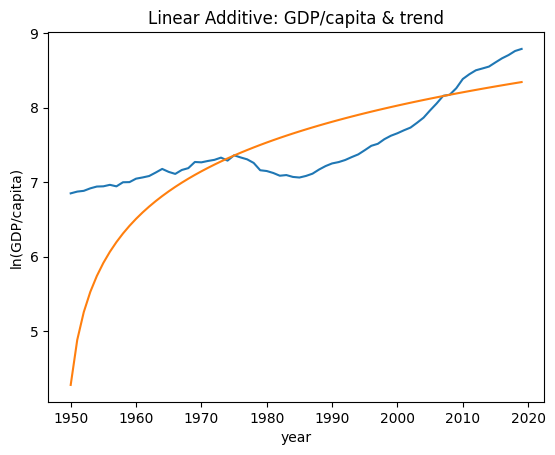

In [16]:
# 3.1) Additive Linear Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# The dependent variable is per capita GDP in *levels*

x1 = np.empty(T) # initialise an empty vector for the first regressor
x2 = np.empty(T) # initialise an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1 # recall that Python starts indexing at 0

a_add_lin, b_add_lin = get_regression_coefs(Y, x1, x2)

# Initialise predicted values yhat
Yhat_add_lin = np.empty(T_all)

# Create loop to compute trend for all years
for t in range(T_all):
    Yhat_add_lin[t] = a_add_lin + b_add_lin * (t + 1) # recall that Python indexing starts at 0

# Let us convert into log-units
yhat_add_lin = np.log(Yhat_add_lin)

lw = 4


plt.figure()
#one could add options such as a particular size and use instead
#plt.figure(figsize=(7, 5))
plt.plot(data['year'],np.log(data['rgdpe_pc']))
plt.plot(data['year'],yhat_add_lin)

#labels
plt.xlabel("year")
plt.ylabel("ln(GDP/capita)")

#title
plt.title("Linear Additive: GDP/capita & trend")


Text(0.5, 1.0, 'Additive Quadratic Model: GDP/capita & Trend')

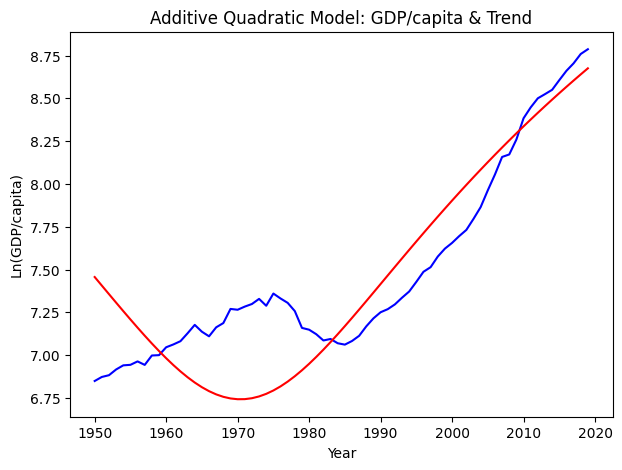

In [17]:
# 3.2) Additive Quadratic Model
# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
# Third regressor x3 is the vector 1^2, 2^2, ..., T^2
x1 = np.empty(T)  # Initialize an empty vector for the first regressor (ones)
x2 = np.empty(T)  # Initialize an empty vector for the second regressor (t)
x3 = np.empty(T)  # Initialize an empty vector for the third regressor (t^2)

for t in range(T):
    x1[t] = 1.  # Vector of ones (intercept)
    x2[t] = t + 1  # Time variable (1, 2, ..., T)
    x3[t] = (t + 1) ** 2  # Time squared variable (1^2, 2^2, ..., T^2)

# Run the regression for the additive quadratic model (GDP ~ t + t^2)
a_add_quad, b_add_quad_t, b_add_quad_t2 = get_regression_coefs(Y, x1, x2, x3)

# Initialize predicted values yhat
Yhat_add_quad = np.empty(T_all)

# Compute the predicted trend for all years
for t in range(T_all):
    Yhat_add_quad[t] = a_add_quad + b_add_quad_t * (t + 1) + b_add_quad_t2 * (t + 1)**2

# Let us convert the trend into log-units
yhat_add_quad = np.log(Yhat_add_quad)

# Plot the actual data and the predicted trend
plt.figure(figsize=(7, 5))
plt.plot(data['year'], np.log(data['rgdpe_pc']), label="Log(GDP) Actual", color='blue')
plt.plot(data['year'], yhat_add_quad, label="Log(GDP) Trend (Additive Quadratic)", color='red')

# Labels
plt.xlabel("Year")
plt.ylabel("Ln(GDP/capita)")

# Title
plt.title("Additive Quadratic Model: GDP/capita & Trend")

Text(0.5, 1.0, 'Exponential + Linear Model: GDP/capita & Trend')

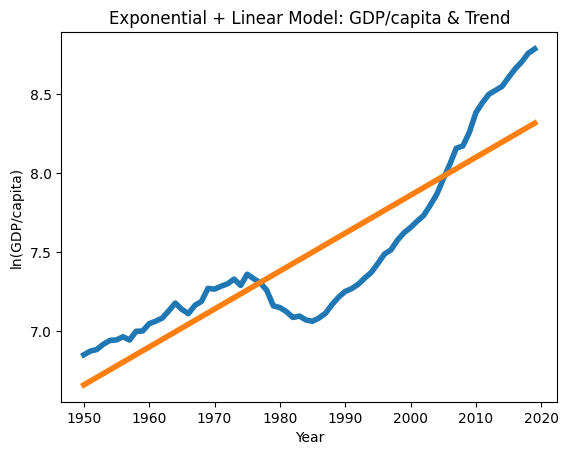

In [18]:
# 3.3) Exponential + Linear Model
# The dependent variable is ln(GDP), which corresponds to exponential growth of GDP.

# First regressor x1 is T x 1 vector of ones, second regressor x2 is the vector 1, 2, ..., T
x1 = np.empty(T)  # initialize an empty vector for the first regressor
x2 = np.empty(T)  # initialize an empty vector for the second regressor

for t in range(T):
    x1[t] = 1.0
    x2[t] = t + 1  # recall Python starts indexing at 0

# Use the log of GDP as the dependent variable (ln(GDP))
ln_Y = np.log(Y)

# Get coefficients for the exponential + linear model
a_exp_lin, b_exp_lin = get_regression_coefs(ln_Y, x1, x2)

# Initialize predicted values ln_yhat for all years
ln_Yhat_exp_lin = np.empty(T_all)

# Compute predicted trend for all years using the model ln(Y) = a + b*t
for t in range(T_all):
    ln_Yhat_exp_lin[t] = a_exp_lin + b_exp_lin * (t + 1)  # recall Python indexing starts at 0

# Convert predicted values from log-units back to levels (GDP)
Yhat_exp_lin = np.exp(ln_Yhat_exp_lin)

# Plot the results
plt.figure()
plt.plot(data["year"], np.log(data["rgdpe_pc"]), label="Observed ln(GDP)", linewidth=lw)
plt.plot(data["year"], np.log(Yhat_exp_lin), label="Trend (Exponential + Linear)", linewidth=lw)

# Labels and title
plt.xlabel("Year")
plt.ylabel("ln(GDP/capita)")
plt.title("Exponential + Linear Model: GDP/capita & Trend")

Text(0.5, 1.0, 'Exponential + Quadratic Model: GDP/capita & Trend')

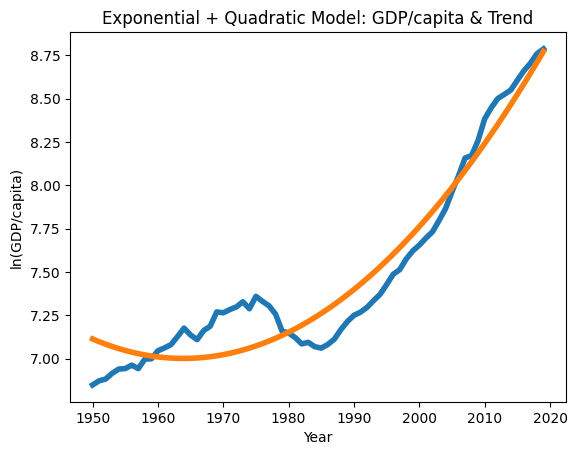

In [19]:
# 3.4) Exponential + Quadratic Model
# The dependent variable is ln(GDP), which corresponds to exponential growth of GDP.

# First regressor x1 is T x 1 vector of ones
# Second regressor x2 is the vector 1, 2, ..., T
# Third regressor x3 is the vector of squared time values: 1^2, 2^2, ..., T^2
x1 = np.empty(T)  # initialize an empty vector for the first regressor
x2 = np.empty(T)  # initialize an empty vector for the second regressor
x3 = np.empty(T)  # initialize an empty vector for the quadratic term

for t in range(T):
    x1[t] = 1.0
    x2[t] = t + 1  # linear time term
    x3[t] = (t + 1) ** 2  # quadratic time term

# Use the log of GDP as the dependent variable (ln(GDP))
ln_Y = np.log(Y)

# Get coefficients for the exponential + quadratic model
a_exp_quad, b_exp_quad, c_exp_quad = get_regression_coefs(ln_Y, x1, x2, x3)

# Initialize predicted values ln_yhat for all years
ln_Yhat_exp_quad = np.empty(T_all)

# Compute predicted trend for all years using the model ln(Y) = a + b*t + c*t^2
for t in range(T_all):
    ln_Yhat_exp_quad[t] = a_exp_quad + b_exp_quad * (t + 1) + c_exp_quad * (t + 1) ** 2

# Convert predicted values from log-units back to levels (GDP)
Yhat_exp_quad = np.exp(ln_Yhat_exp_quad)

# Plot the results
plt.figure()
plt.plot(data["year"], np.log(data["rgdpe_pc"]), label="Observed ln(GDP)", linewidth=4)
plt.plot(data["year"], np.log(Yhat_exp_quad), label="Trend (Exponential + Quadratic)", linewidth=4)

# Labels and title
plt.xlabel("Year")
plt.ylabel("ln(GDP/capita)")
plt.title("Exponential + Quadratic Model: GDP/capita & Trend")

##What we have done:
In this analysis, we examine India's GDP trajectory from 1950 to 2019 by segmenting it into three key historical subperiods: 1950-1979, 1979-1991, and 1991-2019.(after exploring its history) To identify the best-fit growth trend, we evaluated four different models, ultimately selecting the exponential linear model for the first (1950-1979) and third (1991-2019) periods, as they exhibit relatively stable growth trends. However, the 1979-1991 period experienced significant economic fluctuations, requiring a more flexible approach. To accurately capture this transition phase, we employ the exponential quadratic model, which accommodates the slowdown and subsequent structural changes leading up to the 1991 reforms(will dicuss more in the following). This methodology ensures a data-driven and historically contextualized analysis of India's economic trajectory.

While the raw data shows these fluctuations, we will use economic theory to clarify the underlying causes of these changes and explore what factors drove the observed trends.

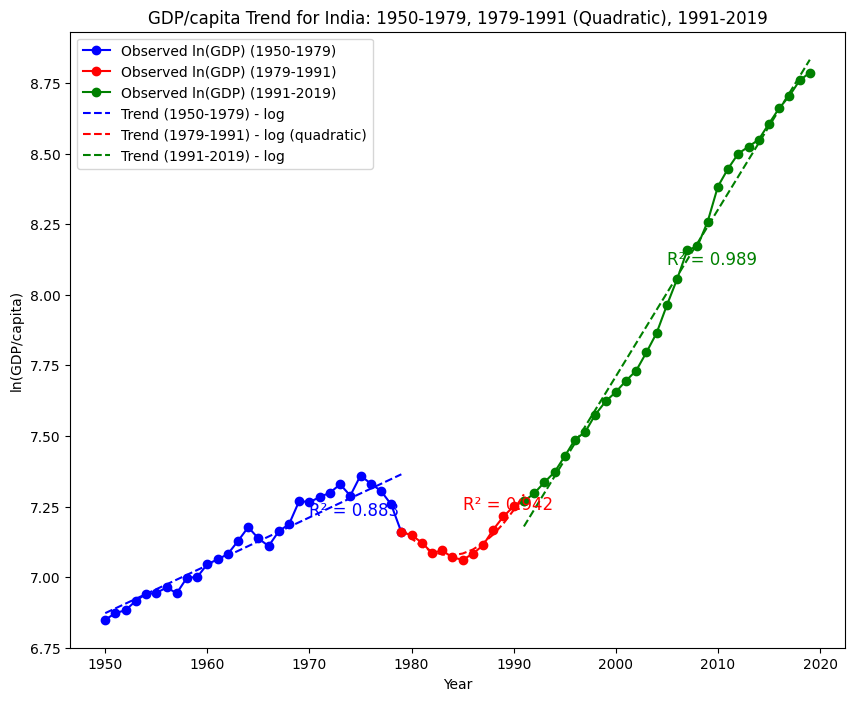

In [20]:
# Find the best-fit for each subperiod

# Function to calculate R² (goodness of fit)
def calculate_r_squared(y_true, y_pred):
    residual_sum_of_squares = np.sum((y_true - y_pred) ** 2)
    total_sum_of_squares = np.sum((y_true - np.mean(y_true)) ** 2)
    r_squared = 1 - (residual_sum_of_squares / total_sum_of_squares)
    return r_squared


# Define subperiods
ymin1, ymax1 = 1950, 1979  # First period
ymin2, ymax2 = 1979, 1991  # Second period
ymin3, ymax3 = 1991, 2019  # Third period

# Subset data for each period
data_50_79 = data[(data["year"] >= ymin1) & (data["year"] <= ymax1)]
data_79_91 = data[(data["year"] >= ymin2) & (data["year"] <= ymax2)]
data_91_19 = data[(data["year"] >= ymin3) & (data["year"] <= ymax3)]

# Extract GDP per capita and compute log-values
Y_50_79 = data_50_79["rgdpe_pc"]
Y_79_91 = data_79_91["rgdpe_pc"]
Y_91_19 = data_91_19["rgdpe_pc"]

ln_Y_50_79 = np.log(Y_50_79)
ln_Y_79_91 = np.log(Y_79_91)
ln_Y_91_19 = np.log(Y_91_19)

# Sample sizes for each period
T_50_79 = len(Y_50_79)
T_79_91 = len(Y_79_91)
T_91_19 = len(Y_91_19)

# Create regressors for each period
# 1950-1979: Exponential Linear Model
x1_50_79 = np.ones(T_50_79)  # Constant term
x2_50_79 = np.arange(1, T_50_79 + 1)  # Time variable
coefs_50_79 = get_regression_coefs(ln_Y_50_79, x1_50_79, x2_50_79)
a_exp_lin_50_79, b_exp_lin_50_79 = coefs_50_79
ln_Yhat_exp_lin_50_79 = a_exp_lin_50_79 + b_exp_lin_50_79 * x2_50_79

# 1979-1991: Exponential Quadratic Model
x1_79_91 = np.ones(T_79_91)  # Constant term
x2_79_91 = np.arange(1, T_79_91 + 1)  # Linear time term
x3_79_91 = x2_79_91 ** 2  # Quadratic time term
coefs_79_91 = get_regression_coefs(ln_Y_79_91, x1_79_91, x2_79_91, x3_79_91)
a_exp_quad_79_91, b_exp_quad_79_91, c_exp_quad_79_91 = coefs_79_91
ln_Yhat_exp_quad_79_91 = a_exp_quad_79_91 + b_exp_quad_79_91 * x2_79_91 + c_exp_quad_79_91 * x3_79_91

# 1991-2019: Exponential Linear Model
x1_91_19 = np.ones(T_91_19)  # Constant term
x2_91_19 = np.arange(1, T_91_19 + 1)  # Time variable
coefs_91_19 = get_regression_coefs(ln_Y_91_19, x1_91_19, x2_91_19)
a_exp_lin_91_19, b_exp_lin_91_19 = coefs_91_19
ln_Yhat_exp_lin_91_19 = a_exp_lin_91_19 + b_exp_lin_91_19 * x2_91_19

# Compute R² values for each period
r_squared_50_79 = calculate_r_squared(ln_Y_50_79, ln_Yhat_exp_lin_50_79)
r_squared_79_91 = calculate_r_squared(ln_Y_79_91, ln_Yhat_exp_quad_79_91)
r_squared_91_19 = calculate_r_squared(ln_Y_91_19, ln_Yhat_exp_lin_91_19)

# Plot results (log-level GDP per capita)
plt.figure(figsize=(10, 8))

# True data (log-level)
plt.plot(data_50_79["year"], ln_Y_50_79, 'bo-', label="Observed ln(GDP) (1950-1979)")
plt.plot(data_79_91["year"], ln_Y_79_91, 'ro-', label="Observed ln(GDP) (1979-1991)")
plt.plot(data_91_19["year"], ln_Y_91_19, 'go-', label="Observed ln(GDP) (1991-2019)")

# Regression trends (log-level)
plt.plot(data_50_79["year"], ln_Yhat_exp_lin_50_79, 'b--', label="Trend (1950-1979) - log")
plt.plot(data_79_91["year"], ln_Yhat_exp_quad_79_91, 'r--', label="Trend (1979-1991) - log (quadratic)")
plt.plot(data_91_19["year"], ln_Yhat_exp_lin_91_19, 'g--', label="Trend (1991-2019) - log")

# Annotate R² values
plt.text(1970, ln_Y_50_79.mean() + 0.1, f"R² = {r_squared_50_79:.3f}", color='blue', fontsize=12)
plt.text(1985, ln_Y_79_91.mean() + 0.1, f"R² = {r_squared_79_91:.3f}", color='red', fontsize=12)
plt.text(2005, ln_Y_91_19.mean() + 0.1, f"R² = {r_squared_91_19:.3f}", color='green', fontsize=12)

# Labels & title
plt.xlabel("Year")
plt.ylabel("ln(GDP/capita)")
plt.title("GDP/capita Trend for India: 1950-1979, 1979-1991 (Quadratic), 1991-2019")
plt.legend()
plt.show()


Now that we have selected the best-fit specification, we will plot real GDP in the same way as we did for real GDP per capita.

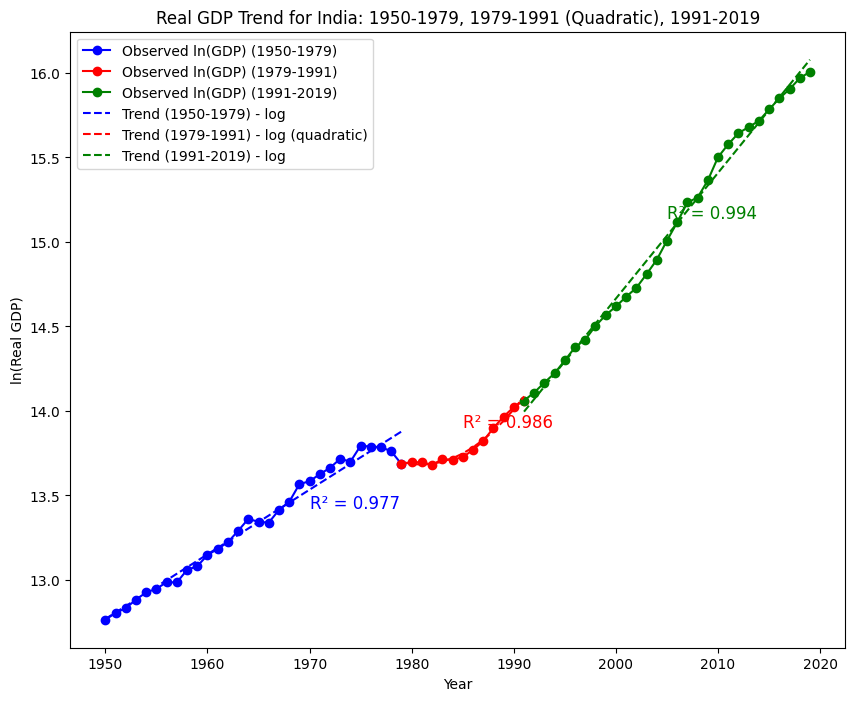

In [21]:
# Subset data for each period
# Subset data for each period (using data1 for Real GDP)
data1_50_79 = data1[(data1["year"] >= ymin1) & (data1["year"] <= ymax1)]
data1_79_91 = data1[(data1["year"] >= ymin2) & (data1["year"] <= ymax2)]
data1_91_19 = data1[(data1["year"] >= ymin3) & (data1["year"] <= ymax3)]

# Get Real GDP series for regression
Y1_50_79 = data1_50_79["rgdpe"]
Y1_79_91 = data1_79_91["rgdpe"]
Y1_91_19 = data1_91_19["rgdpe"]

ln_Y1_50_79 = np.log(Y1_50_79)
ln_Y1_79_91 = np.log(Y1_79_91)
ln_Y1_91_19 = np.log(Y1_91_19)

# Sample sizes
T_50_79 = len(Y1_50_79)
T_79_91 = len(Y1_79_91)
T_91_19 = len(Y1_91_19)

# Create regressors for each period
x1_50_79 = np.ones(T_50_79)
x2_50_79 = np.arange(1, T_50_79 + 1)

x1_91_19 = np.ones(T_91_19)
x2_91_19 = np.arange(1, T_91_19 + 1)

# Get regression coefficients using exponential linear model for 1950-1979 and 1991-2019
coefs1_50_79 = get_regression_coefs(ln_Y1_50_79, x1_50_79, x2_50_79)
coefs1_91_19 = get_regression_coefs(ln_Y1_91_19, x1_91_19, x2_91_19)

a1_exp_lin_50_79, b1_exp_lin_50_79 = coefs1_50_79
a1_exp_lin_91_19, b1_exp_lin_91_19 = coefs1_91_19

ln_Y1hat_exp_lin_50_79 = a1_exp_lin_50_79 + b1_exp_lin_50_79 * x2_50_79
ln_Y1hat_exp_lin_91_19 = a1_exp_lin_91_19 + b1_exp_lin_91_19 * x2_91_19

# Modify the middle period (1979-1991) to use an exponential quadratic model
x1_79_91 = np.ones(T_79_91)
x2_79_91 = np.arange(1, T_79_91 + 1)
x3_79_91 = x2_79_91 ** 2

coefs1_79_91 = get_regression_coefs(ln_Y1_79_91, x1_79_91, x2_79_91, x3_79_91)
a1_exp_quad_79_91, b1_exp_quad_79_91, c1_exp_quad_79_91 = coefs1_79_91
ln_Y1hat_exp_quad_79_91 = a1_exp_quad_79_91 + b1_exp_quad_79_91 * x2_79_91 + c1_exp_quad_79_91 * x3_79_91

# Calculate R² for log-level data
r_squared_50_79 = calculate_r_squared(ln_Y1_50_79, ln_Y1hat_exp_lin_50_79)
r_squared_79_91 = calculate_r_squared(ln_Y1_79_91, ln_Y1hat_exp_quad_79_91)
r_squared_91_19 = calculate_r_squared(ln_Y1_91_19, ln_Y1hat_exp_lin_91_19)

# Plot results (log-level)
plt.figure(figsize=(10, 8))

plt.plot(data1_50_79["year"], np.log(Y1_50_79), 'bo-', label="Observed ln(GDP) (1950-1979)")
plt.plot(data1_79_91["year"], np.log(Y1_79_91), 'ro-', label="Observed ln(GDP) (1979-1991)")
plt.plot(data1_91_19["year"], np.log(Y1_91_19), 'go-', label="Observed ln(GDP) (1991-2019)")

plt.plot(data1_50_79["year"], ln_Y1hat_exp_lin_50_79, 'b--', label="Trend (1950-1979) - log")
plt.plot(data1_79_91["year"], ln_Y1hat_exp_quad_79_91, 'r--', label="Trend (1979-1991) - log (quadratic)")
plt.plot(data1_91_19["year"], ln_Y1hat_exp_lin_91_19, 'g--', label="Trend (1991-2019) - log")

plt.text(1970, np.log(Y1_50_79).mean() + 0.1, f"R² = {r_squared_50_79:.3f}", color='blue', fontsize=12)
plt.text(1985, np.log(Y1_79_91).mean() + 0.1, f"R² = {r_squared_79_91:.3f}", color='red', fontsize=12)
plt.text(2005, np.log(Y1_91_19).mean() + 0.1, f"R² = {r_squared_91_19:.3f}", color='green', fontsize=12)

plt.xlabel("Year")
plt.ylabel("ln(Real GDP)")
plt.title("Real GDP Trend for India: 1950-1979, 1979-1991 (Quadratic), 1991-2019")
plt.legend()
plt.show()



In [22]:
# The slopes of fitted lines for real GDP
slope_gdp_50_79 = b1_exp_lin_50_79  # Linear growth rate for 1950-1979
# For 1979-1991, the growth rate is not constant, so we approximate it using the linear coefficient
slope_gdp_79_91 = b1_exp_quad_79_91 + 2 * c1_exp_quad_79_91 * (T_79_91 / 2)  # Approximate average slope
slope_gdp_91_19 = b1_exp_lin_91_19  # Linear growth rate for 1991-2019

# The slopes of fitted lines for real GDP per capita
slope_gdp_pc_50_79 = b_exp_lin_50_79  # Linear growth rate for 1950-1979
slope_gdp_pc_79_91 = b_exp_quad_79_91 + 2 * c_exp_quad_79_91 * (T_79_91 / 2)  # Approximate average slope
slope_gdp_pc_91_19 = b_exp_lin_91_19  # Linear growth rate for 1991-2019

# Print formatted comparison of growth rates
print("Comparison of Fitted Line Slopes (Growth Rates):\n")
print(f"{'Period':<15}{'GDP Growth Rate':<25}{'GDP per Capita Growth Rate':<25}")
print("-" * 70)
print(f"1950-1979  \t {slope_gdp_50_79:.5f} ({slope_gdp_50_79 * 100:.2f}%) \t  {slope_gdp_pc_50_79:.5f} ({slope_gdp_pc_50_79 * 100:.2f}%)")
print(f"1979-1991 \t {slope_gdp_79_91:.5f} ({slope_gdp_79_91 * 100:.2f}%) \t  {slope_gdp_pc_79_91:.5f} ({slope_gdp_pc_79_91 * 100:.2f}%)")
print(f"1991-2019  \t {slope_gdp_91_19:.5f} ({slope_gdp_91_19 * 100:.2f}%) \t {slope_gdp_pc_91_19:.5f} ({slope_gdp_pc_91_19 * 100:.2f}%)")



Comparison of Fitted Line Slopes (Growth Rates):

Period         GDP Growth Rate          GDP per Capita Growth Rate
----------------------------------------------------------------------
1950-1979  	 0.03825 (3.83%) 	  0.01695 (1.70%)
1979-1991 	 0.02835 (2.83%) 	  0.00594 (0.59%)
1991-2019  	 0.07437 (7.44%) 	 0.05904 (5.90%)


Based on this fact; "If GDP grows faster than GDP per capita, population growth is significant,"

From 1950 to 1979, India's GDP grew at an annual rate of 3.8%, but high population growth limited GDP per capita growth to 1.7%, reflecting slow improvements in living standards. Between 1979 and 1991, economic stagnation and instability resulted in GDP per capita growth of only 0.6%. This suggests that population growth, rather than labor productivity, was the primary driver of GDP expansion, leading to worsening economic conditions. 
From 1991 to 2019, India's economic landscape transformed dramatically, with GDP growing at an average annual rate of 7.44% and GDP per capita at 5.90%, signaling a shift from population-driven growth to productivity-led expansion. This period, fueled by economic liberalization, globalization, and market-oriented reforms, saw higher wages, increased investment, and industrial expansion, leading to significant improvements in living standards compared to previous decades.

Note: Just to be more clear about India's transition phase, which we identify as occurring between 1979 and 1991, this period was marked by economic stagnation, policy shifts, and early liberalization efforts. While growth remained slow, reforms introduced during the 1980s laid the groundwork for the 1991 economic transformation, making this a crucial phase in India's economic evolution.

#Levels vs log levels:

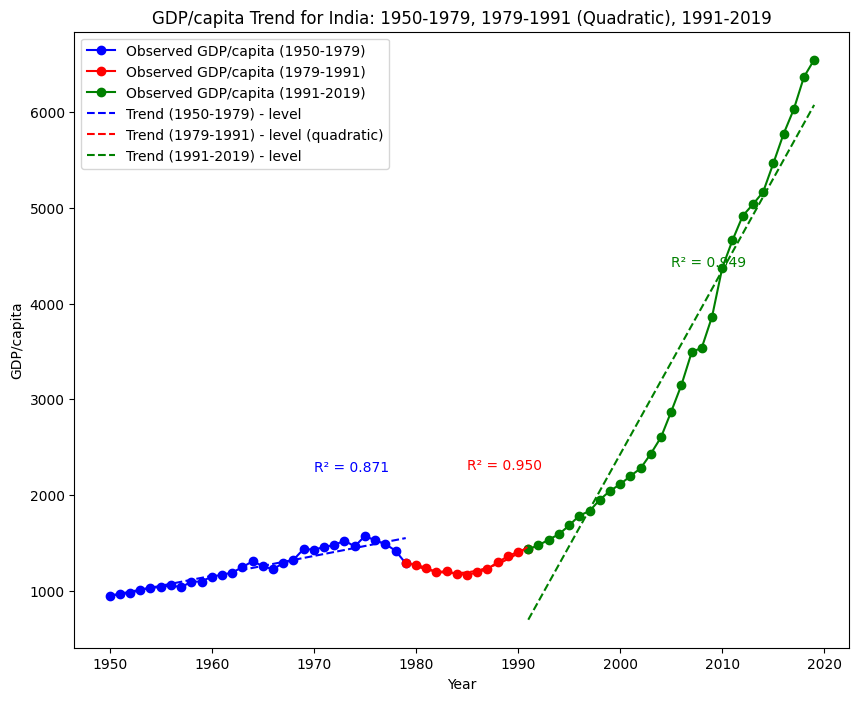

In [23]:
# As a robustness exercise, use the levels instead of log levels in the trend (for real GDP per capita)

# Get regression coefficients using get_regression_coefs for each period (level)
coefs_50_79_level = get_regression_coefs(Y_50_79, x1_50_79, x2_50_79)
coefs_91_19_level = get_regression_coefs(Y_91_19, x1_91_19, x2_91_19)

# Extract coefficients for level data
a_exp_lin_50_79_level, b_exp_lin_50_79_level = coefs_50_79_level
a_exp_lin_91_19_level, b_exp_lin_91_19_level = coefs_91_19_level

# Compute predicted trends (level)
Yhat_exp_lin_50_79 = a_exp_lin_50_79_level + b_exp_lin_50_79_level * x2_50_79
Yhat_exp_lin_91_19 = a_exp_lin_91_19_level + b_exp_lin_91_19_level * x2_91_19

# **Use regression for 1979-1991 with quadratic model**
x1_79_91 = np.ones(T_79_91)
x2_79_91 = np.arange(1, T_79_91 + 1)
x3_79_91 = x2_79_91 ** 2

# Get regression coefficients for 1979-1991 quadratic model (in levels)
a_exp_quad_79_91_level, b_exp_quad_79_91_level, c_exp_quad_79_91_level = get_regression_coefs(Y_79_91, x1_79_91, x2_79_91, x3_79_91)

# Compute predicted trend for 1979-1991
Yhat_exp_quad_79_91 = a_exp_quad_79_91_level + b_exp_quad_79_91_level * x2_79_91 + c_exp_quad_79_91_level * x3_79_91

# Calculate R² for level data
r_squared_50_79_level = calculate_r_squared(Y_50_79, Yhat_exp_lin_50_79)
r_squared_79_91_level = calculate_r_squared(Y_79_91, Yhat_exp_quad_79_91)
r_squared_91_19_level = calculate_r_squared(Y_91_19, Yhat_exp_lin_91_19)

# Plot results (level)
plt.figure(figsize=(10, 8))

# True data (level)
plt.plot(data_50_79["year"], Y_50_79, 'bo-', label="Observed GDP/capita (1950-1979)")
plt.plot(data_79_91["year"], Y_79_91, 'ro-', label="Observed GDP/capita (1979-1991)")
plt.plot(data_91_19["year"], Y_91_19, 'go-', label="Observed GDP/capita (1991-2019)")

# Regression trends (level)
plt.plot(data_50_79["year"], Yhat_exp_lin_50_79, 'b--', label="Trend (1950-1979) - level")
plt.plot(data_79_91["year"], Yhat_exp_quad_79_91, 'r--', label="Trend (1979-1991) - level (quadratic)")
plt.plot(data_91_19["year"], Yhat_exp_lin_91_19, 'g--', label="Trend (1991-2019) - level")

# Annotate R² values on the plot
plt.text(1970, Y_50_79.mean() + 1000, f"R² = {r_squared_50_79_level:.3f}", color='blue', fontsize=10)
plt.text(1985, Y_79_91.mean() + 1000, f"R² = {r_squared_79_91_level:.3f}", color='red', fontsize=10)
plt.text(2005, Y_91_19.mean() + 1000, f"R² = {r_squared_91_19_level:.3f}", color='green', fontsize=10)

# Labels & title
plt.xlabel("Year")
plt.ylabel("GDP/capita")
plt.title("GDP/capita Trend for India: 1950-1979, 1979-1991 (Quadratic), 1991-2019")
plt.legend()
plt.show()






When we use levels instead of log levels in a trend regression of GDP over time, the shape of the GDP-time graph will change more significantly, So non-Stationarity Becomes More Apparent; GDP in levels tends to grow exponentially over time, so plotting GDP against time as we can see, show a steeply increasing curve rather than a straight line. In contrast, the log-transformed GDP would have shown a more linear trend, making it easier to interpret long-term growth rates (the slope of the regression line represents the approximate percentage growth rate of GDP). Moreover, using levels can lead to heteroskedastic residuals (variance increasing over time), making the model less reliable. 


However, using GDP levels is more appropriate for short-term analysis because it captures absolute changes, which are crucial for policymakers and analysts focusing on immediate economic shifts. Unlike log GDP, which emphasizes percentage growth, GDP levels better reflect the actual magnitude of recessions, crises, or policy interventions. Short-term trends do not always follow exponential growth, making a linear approach in levels more suitable. Additionally, absolute GDP figures are often more intuitive for decision-making in fiscal and monetary policy. In contrast, log GDP is preferred for long-term trend analysis as it accounts for exponential growth, stabilizes variance, and avoids spurious regression issues. 

Ultimately, while log GDP is better for understanding long-run growth patterns, GDP levels provide a clearer picture of short-term fluctuations and economic shocks.

##part B
TFP calculation (assuming alpha = 0.3), then check the robustness of our model for other values of alpha.

In [24]:
## Part B: Calculate TFP and TFP with Human Capital (hc)
# Y = (K**alpha)*(AL)**(1-alpha)  --> Eq. 1
# Rearranging for A:
# A = ((Y/(K**alpha))**(1/(1-alpha)))/L  --> Eq. 2

# Extract relevant data for India
data2 = data0.loc[data0['country'] == "India", ["country", "year", "rgdpna", "emp", "rnna", "hc"]]

# Define alpha
alpha = 0.3  # You can change this for robustness check
# alpha = 0.6  # Uncomment for robustness testing

# Compute TFP
data2['TFP (alpha)'] = (data2['rgdpna'] / (data2['rnna'] ** alpha * data2['emp'] ** (1 - alpha))) ** (1 / (1 - alpha))

# Compute TFP including human capital (hc)
data2['TFP_hc (alpha)'] = (data2['rgdpna'] / (data2['rnna'] * alpha * (data2['hc'] * data2['emp']) * (1 - alpha))) ** (1 / (1 - alpha))

# Display TFP and TFP_hc side by side
print('alpha =', alpha)
print("\n\t ========= TFP Comparison =========\n")
print(f"{'Year':<10}{'TFP (alpha)':<20}{'TFP_hc (alpha)':<20}")  # Properly formatted header
print("-" * 50)
for year, tfp, tfp_hc in zip(data2['year'], data2['TFP (alpha)'], data2['TFP_hc (alpha)']):
    print(f"{year:<10}{tfp:<20.6}{tfp_hc:<20.6f}")  # Prints 6 decimal places


alpha = 0.3

	 ========= TFP Comparison =========

Year      TFP (alpha)         TFP_hc (alpha)      
--------------------------------------------------
1950      1384.61             0.001753            
1951      1373.55             0.001638            
1952      1437.02             0.001650            
1953      1510.64             0.001654            
1954      1529.12             0.001560            
1955      1510.45             0.001425            
1956      1497.92             0.001305            
1957      1440.85             0.001178            
1958      1529.88             0.001180            
1959      1517.04             0.001108            
1960      1605.51             0.001077            
1961      1626.74             0.001007            
1962      1638.77             0.000932            
1963      1723.64             0.000899            
1964      1830.99             0.000874            
1965      1706.3              0.000749            
1966      1635.51             0

##Part C
Growth accounting

In [25]:
## Part C: Growth Accounting Analysis

# Y = (K**alpha)*(AL)**(1-alpha)  --> Eq. 1
# Y: real GDP (rgdpna)
# A: TFP 
# L: the number of employed workers (emp)
# K: the capital stock at constant 2017 national prices (rnna)

# Set "year" as index for easier data selection
data2 = data2.set_index("year")

# Select specific years for growth accounting analysis
ga_data = data2.loc[[1950, 1979, 1991, 2019]]  
year = ga_data.index.to_numpy()  

'''
We observe distinct shifts in economic growth patterns across the selected periods. 
The first subperiod (1950-1979) captures the pre-reform growth trajectory, while the second subperiod (1979-1991) 
reflects structural changes leading up to the 1991 economic liberalization. 
The third subperiod (1991-2019) represents the post-reform period, characterized by accelerated growth. 
These divisions allow us to analyze the changing contributions of capital, labor, and TFP to overall GDP growth.
'''

# Extract variables for growth rate calculation
YY = ga_data["rgdpna"].to_numpy()  # Real GDP
K = ga_data["rnna"].to_numpy()     # Capital Stock
L = ga_data["emp"].to_numpy()      # Employment
A = ga_data["TFP (alpha)"].to_numpy()  # TFP


def compute_growth(X):
    return np.log(X[1:]/X[:-1])


gY = compute_growth(YY)
gA = compute_growth(A)
gK = compute_growth(K)
gL = compute_growth(L)


# Display growth rates and their contributions


print("Growth rates:")
print("\t Year \t\t gY \t\t gK \t\t gL \t\t gA")
print("\t ------ \t --------- \t --------- \t --------- \t ---------")

for y1, y2, ga_Y, ga_K, ga_L, ga_A in zip(year[:-1], year[1:], gY, gK, gL, gA):
    print(f"\t{y1:.0f}-{y2:.0f} \t {ga_Y:.4f} \t {ga_K:.4f} \t {ga_L:.4f} \t {ga_A:.4f}")


print("\nGrowth contributions:")
print("\t Year \t\t Y \t\t K \t\t L \t\t A")
print("\t ------ \t --------- \t --------- \t --------- \t ---------")


for y1, y2, ga_Y, ga_K, ga_L, ga_A in zip(year[:-1], year[1:], gY, gK, gL, gA):
    print(f"\t{y1:.0f}-{y2:.0f} \t {(ga_Y/ga_Y)*100:.2f} %\t {((ga_K)*(alpha)/ga_Y)*100:.2f} %\t {((ga_L)*(1-alpha)/ga_Y)*100:.2f}% \t {((ga_A)*(1-alpha)/ga_Y)*100:.2f}%")


Growth rates:
	 Year 		 gY 		 gK 		 gL 		 gA
	 ------ 	 --------- 	 --------- 	 --------- 	 ---------
	1950-1979 	 1.0296 	 1.6575 	 0.5000 	 0.2605
	1979-1991 	 0.6164 	 0.5395 	 0.3211 	 0.3282
	1991-2019 	 1.7465 	 1.7156 	 0.3402 	 1.4196

Growth contributions:
	 Year 		 Y 		 K 		 L 		 A
	 ------ 	 --------- 	 --------- 	 --------- 	 ---------
	1950-1979 	 100.00 %	 48.30 %	 33.99% 	 17.71%
	1979-1991 	 100.00 %	 26.26 %	 36.47% 	 37.27%
	1991-2019 	 100.00 %	 29.47 %	 13.64% 	 56.90%


##Part D
Labour productivity is defined as output per worker: Y / L

In [26]:
# part D
# Calculate Labor Productivity (GDP per Worker)
# Using the production function:
# Y = A^(1-alpha) * K^alpha * L^(1-alpha)

# Dividing both sides by total labor (L):
# Y / L = A^(1-alpha) * K^alpha * (L / L)^(1-alpha)
# Since total labor (L) is divided into production labor (L_Y) and research labor (L_A), we can express:
# L_Y / L = 1 - L_A / L
# Thus, labour productivity (Y / L) depends on:
# 1. Technology (A) -> Higher A improves worker efficiency.
# 2. Capital per Worker (K / L) -> More capital per worker boosts productivity.
# 3. Labor Allocation to Production (L_Y / L) -> If more workers go to research (L_A), 
#    productivity in the short run may decline but improve in the long run.

data3 = data0.loc[:, ("country", "year", "rgdpe", "emp")]
data3["labour_productivity"] = data3["rgdpe"] / data3["emp"]

# Select our country (India)
data3 = data3.loc[data3["country"] == "India", ("year", "rgdpe", "emp", "labour_productivity")]

# Subset the data to years between 1950 and 2019
ymax = 2019
ymin = 1950
data3 = data3.loc[(data3["year"] <= ymax) & (data3["year"] >= ymin)]

# Reset the index
data3 = data3.reset_index(drop=True)

# Calculate log of labor productivity for further analysis
data3["log_labour_productivity"] = np.log(data3["labour_productivity"])

# Now, display the labor productivity for inspection
print("Labor Productivity (GDP per Worker):")
print(data3[["year", "labour_productivity", "log_labour_productivity"]])

Labor Productivity (GDP per Worker):
    year  labour_productivity  log_labour_productivity
0   1950          2244.400464                 7.716194
1   1951          2307.994909                 7.744134
2   1952          2342.066636                 7.758789
3   1953          2432.614105                 7.796722
4   1954          2502.928783                 7.825217
..   ...                  ...                      ...
65  2015         14831.639796                 9.604518
66  2016         15825.970744                 9.669408
67  2017         16564.299931                 9.715005
68  2018         17537.113989                 9.772075
69  2019         17976.817437                 9.796838

[70 rows x 3 columns]
